In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.matrixlib.defmatrix import matrix

In [44]:
def returnFunctionComplex(x, v):
    
    """
    Função responsável por retornar um sinal de valores complexos com adição de ruído
    parametro x: matriz de valores aleatórios
    parametro v: ruído

    returna d: sinal de amostra com ruído
    """
    d = 2*x[:, 0] + 0.1*x[:, 1]-(8j) + v
    return d

def LMS_Filter_Complex(d, x):
    """
    parametro d: sinal alvo de entrada com adição de ruído
    parametro x: matriz de valores aleatórios

    returna y: Sinal de saída 
    returna e: erro
    returna W: coeficientes atualizados
    
    """
   
    N = len(x)

    if not len(d) == N:
        raise ValueError('The length of vector d and matrix x must agree.')

    n = len(x[0])

    try:
        x = np.array(x)
        d = np.array(d)

    except:
        raise ValueError('Impossible to convert x or d to a numpy array')

    # create empty arrays
    y = np.zeros(N, dtype = complex)
    e = np.zeros(N, dtype = complex)

    W_history = np.zeros((N, n), dtype = complex)  # coeficientes de W

    Wcoef = np.random.normal(0, 0.5, n) * 1j
    #Wcoef = np.zeros(n, dtype = complex)
    W = np.matrix(Wcoef)
    W.getH() ### HERMETIANO dos coeficientes #####
    
    # Adaptação ##### Algoritimo LMS Complexo ######
    for k in range(N):

        W_history[k, :] = W
        y[k] = np.dot(W, x[k])
        e[k] = d[k] - y[k]
        dw = mi * e[k] * x[k]
        W += dw

    return y, e, W_history

# Dados de entrada
N = 1000
mi = 0.05  # Coeficiente mi
x = np.random.normal(0, 0.51,(N, 4))# input matrix
v = np.random.normal(0, 0.1, N) # noise


d_novo = returnFunctionComplex(x, v)



youtComplex, erroComplex, wComplex = LMS_Filter_Complex(d_novo, x) # Filtro Complexo

C:\Users\luizh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\luizh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\luizh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


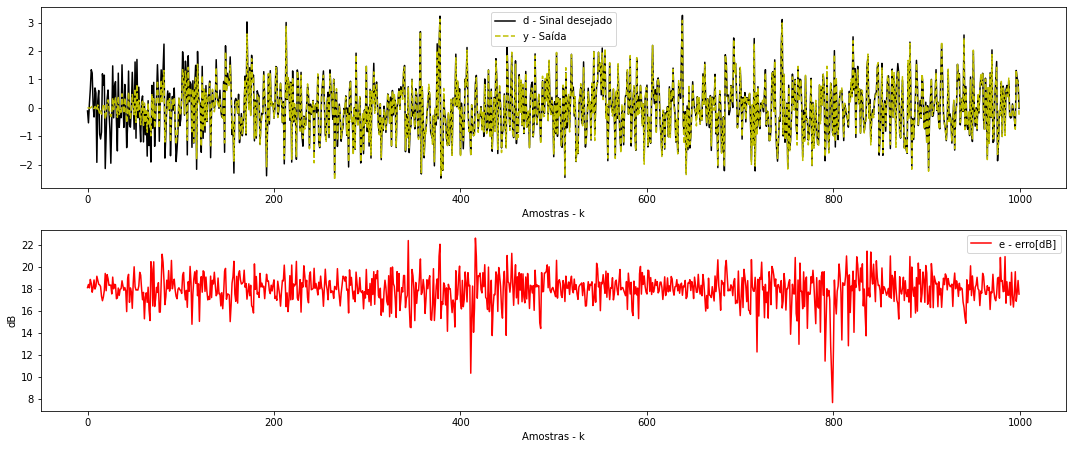

In [45]:
# plotagem
plt.figure(figsize = (15,9))
plt.subplot(311)
plt.plot(d_novo,'black', linewidth=(1.5), label = "d - Sinal desejado")
plt.plot(youtComplex, '--y',label = "y - Saída");plt.legend();
plt.xlabel("Amostras - k")

plt.subplot(312)
plt.plot(10*np.log10(erroComplex**2), 'r', label = "e - erro[dB]");plt.legend()
plt.xlabel("Amostras - k");plt.ylabel("dB")

plt.tight_layout()
plt.tight_layout()
plt.show()